In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [2]:
from keras.wrappers.scikit_learn import KerasRegressor

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [4]:
data = pd.read_csv("housingdata.csv", header=None)
train = data #.sample(frac=1)
#test  = data.loc[~data.index.isin(train.index)]
#train.reset_index(drop=True, inplace = True)
#test.reset_index(drop=True, inplace = True)
X = train.iloc[:,0:13]   
Y = train.iloc[:,13]

In [5]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: 13, Length: 506, dtype: float64

In [6]:
def baseline_model():
    model = Sequential()
    model.add(Dense(5, input_shape=(13,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [8]:
baseline_model().summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 70        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [9]:
X = np.asarray(X)
Y = np.asarray(Y)

In [10]:
len(X)

506

In [11]:
seed = 107 
np.random.seed(seed)
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=500, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
results = cross_val_score(estimator, X, Y, cv=kfold, n_jobs=1)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

<ipython-input-11-97c3efec84a5>:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=500, batch_size=5, verbose=0)


Results: -363.51 (232.09) MSE


In [95]:
estimator.fit?

In [12]:
estimator.fit(X,Y, epochs=500, batch_size=5)

In [14]:
prediction = estimator.predict(X)
res = pd.DataFrame({'Real':Y, 'Pred':prediction})

<AxesSubplot:>

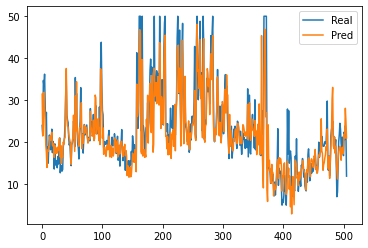

In [15]:
res.plot()